#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Miguel Ángel Álvarez Carmona <center>
<center> Cómputo Estadístico <center>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

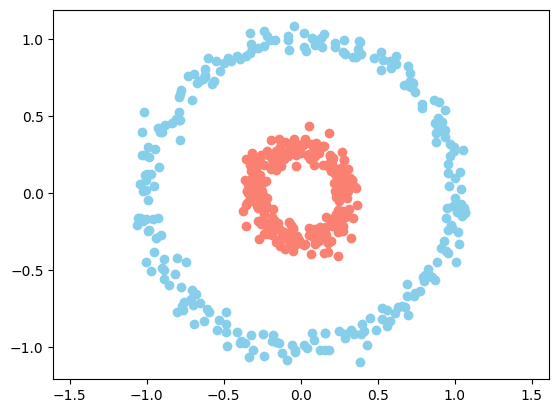

In [ ]:
# crear la base de datos

n = 500 # instancias
p = 2 #features

X, y = make_circles(n_samples=n, factor=0.3, noise=0.050);

y = y[:, np.newaxis]
plt.scatter(X[y[ :, 0]==0, 0], X[y[ :, 0]==0,1], c='skyblue');
plt.scatter(X[y[ :, 0]==1, 0], X[y[ :, 0]==1,1], c='salmon');
plt.axis('equal')
plt.show()

In [ ]:
# clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f;
    self.b = np.random.rand(1, n_neur) * 2 - 1;
    self.W = np.random.rand(n_conn, n_neur) * 2 -1;

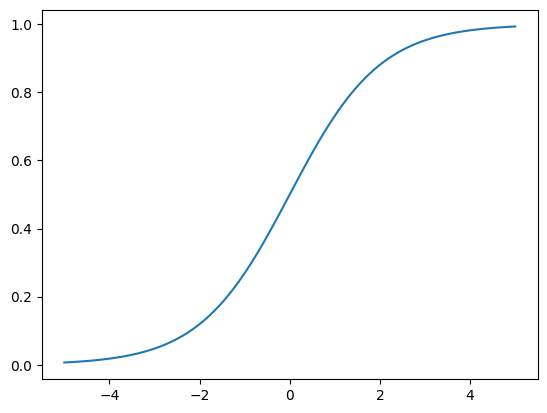

In [ ]:
#funciones de activacion y sus derivadas

sigm = (lambda x: 1 / (1 + np.e**(-x)), lambda x: x * (1 - x))

#relu = (lambda x: np.maximum(0,x), lambda x: np.maximum(0,x)/x )

#linear = (lambda x: x, lambda x: x/x)



_x = np.linspace(-5, 5, 100);
plt.plot(_x, sigm[0](_x))



In [ ]:
def create_nn(topology, act_f):

  nn = [];
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f=act_f));

  return nn;



In [ ]:
topology = [p, 2, 2, 1]
nn = create_nn(topology, sigm);


In [ ]:
#función de coste y su derivada

l2_cost = (lambda yP, yR: np.mean((yP-yR)**2), lambda yP, yR: (yP - yR))

In [ ]:
def train(neural_net, X, y, L2_cost, lr = 0.5, train=True):


  out = [(None, X)];


  #hacia adelante

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z);

    out.append((z, a))

  if train:

    #back

    deltas = []
    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0];
      a = out[l+1][1];


      if l == len(neural_net) - 1:
        #calcular delta de la ultima capa
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a));

      else:
        #calcular delta respecto a la capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a));

      _W = neural_net[l].W
      #gradiente descendente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr;
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr;


  return out[-1][1]





In [ ]:
res = train(nn, X, y, l2_cost, lr=0.5, train=True);
res

array([[0.43226182],
       [0.40180003],
       [0.46013501],
       [0.44981697],
       [0.41784396],
       [0.44743692],
       [0.45278719],
       [0.45440121],
       [0.43179492],
       [0.44458251],
       [0.4502726 ],
       [0.4402584 ],
       [0.38713646],
       [0.44775713],
       [0.44408844],
       [0.46102932],
       [0.43546809],
       [0.45387591],
       [0.44945851],
       [0.40110581],
       [0.43439022],
       [0.42287676],
       [0.42016088],
       [0.45477931],
       [0.39648974],
       [0.44292888],
       [0.45282531],
       [0.45535202],
       [0.43635199],
       [0.45255791],
       [0.45315003],
       [0.41951718],
       [0.4375062 ],
       [0.46061105],
       [0.45198996],
       [0.46086415],
       [0.39716203],
       [0.44344653],
       [0.45957945],
       [0.38885529],
       [0.44037661],
       [0.43619299],
       [0.41924257],
       [0.45931739],
       [0.45536381],
       [0.38452557],
       [0.43592887],
       [0.385

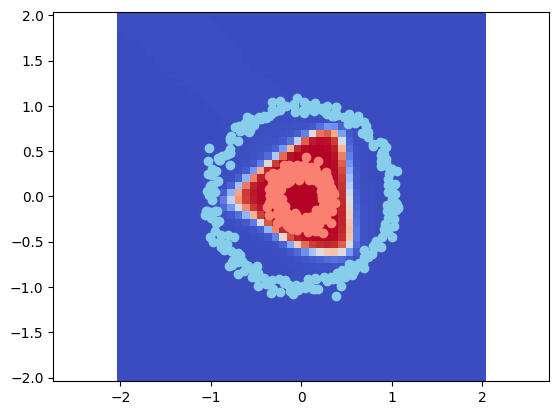

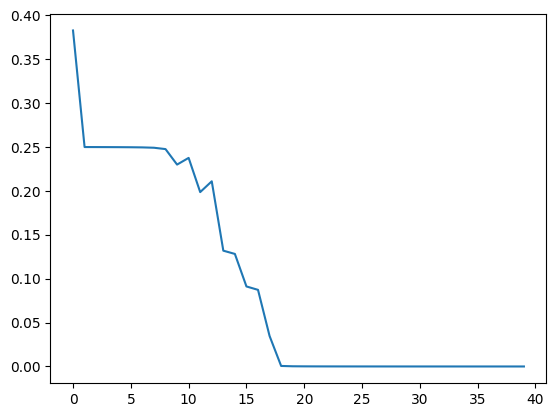

In [ ]:
import time
from IPython.display import clear_output

topology = [p, 8,8,8,8, 1]
neural_n = create_nn(topology, sigm)

loss = []

for i in range(1000):

  pY = train(neural_n, X, y, l2_cost, lr=0.1);

  if i % 25 == 0:

    loss.append(l2_cost[0](pY, y));

    res = 50

    _x0 = np.linspace(-2, 2, res);
    _x1 = np.linspace(-2, 2, res);

    _Y = np.zeros((res, res));
    for i0, x0 in enumerate(_x0):
      for i1, x1, in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0];
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal");

    plt.scatter(X[y[:,0]==0, 0], X[y[:,0]==0, 1], c="skyblue");
    plt.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c="salmon");

    clear_output(wait=True);
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)